# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

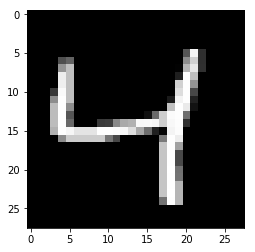

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
image_size = mnist.train.images.shape[1]
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [7]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6954
Epoch: 1/20... Training loss: 0.6920
Epoch: 1/20... Training loss: 0.6885
Epoch: 1/20... Training loss: 0.6846
Epoch: 1/20... Training loss: 0.6803
Epoch: 1/20... Training loss: 0.6747
Epoch: 1/20... Training loss: 0.6676
Epoch: 1/20... Training loss: 0.6601
Epoch: 1/20... Training loss: 0.6509
Epoch: 1/20... Training loss: 0.6407
Epoch: 1/20... Training loss: 0.6286
Epoch: 1/20... Training loss: 0.6156
Epoch: 1/20... Training loss: 0.6030
Epoch: 1/20... Training loss: 0.5851
Epoch: 1/20... Training loss: 0.5693
Epoch: 1/20... Training loss: 0.5505
Epoch: 1/20... Training loss: 0.5337
Epoch: 1/20... Training loss: 0.5162
Epoch: 1/20... Training loss: 0.4976
Epoch: 1/20... Training loss: 0.4766
Epoch: 1/20... Training loss: 0.4594
Epoch: 1/20... Training loss: 0.4447
Epoch: 1/20... Training loss: 0.4280
Epoch: 1/20... Training loss: 0.4143
Epoch: 1/20... Training loss: 0.3955
Epoch: 1/20... Training loss: 0.3870
Epoch: 1/20... Training loss: 0.3760
E

Epoch: 1/20... Training loss: 0.1987
Epoch: 1/20... Training loss: 0.1989
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.1985
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1986
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.2035
Epoch: 1/20... Training loss: 0.1994
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1979
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.2012
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1911
E

Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1621
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1651
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1550
E

Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1315
E

Epoch: 3/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1301
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1225
E

Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1109
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1084
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1153
E

Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1086
E

Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1083
E

Epoch: 7/20... Training loss: 0.1078
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1019
E

Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0958
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0961
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.0983
E

Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0928
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0980
E

Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0908
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0975
E

Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0997
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0992
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0990
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0986
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0897
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0986
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0986
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0985
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0991
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0980
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0979
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

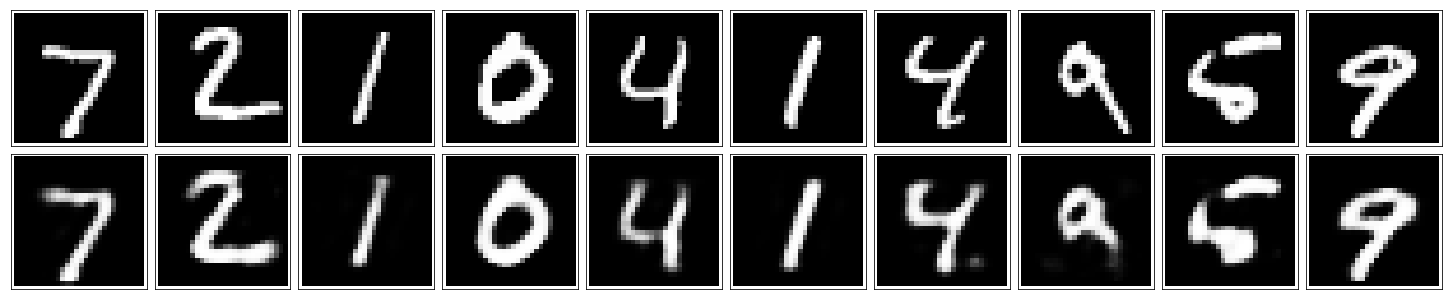

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [10]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.